In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Dilation:

#### 1-Square-circle:

Text(0.5, 1.0, 'square-circle-1.jpg')

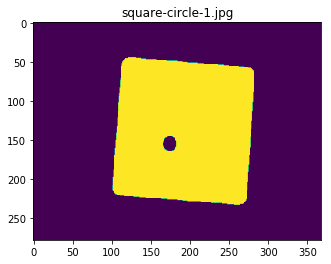

In [2]:
img_sq_circ = cv2.imread('Square-circle.png',0)

##Circle kernel
circle=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
dilation_circ = cv2.dilate(img_sq_circ,circle,iterations = 1)
plt.imshow(dilation_circ)
plt.title('square-circle-1.jpg')
#cv2.imwrite('square-circle-1.png', dilation_sq)


Text(0.5, 1.0, 'square-circle-2.jpg')

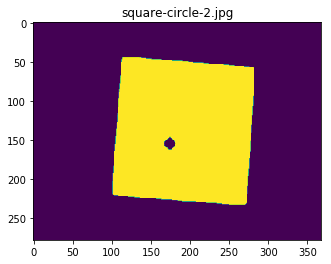

In [3]:
##Square kernel
square = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
dilation_sq = cv2.dilate(img_sq_circ,square,iterations = 1)
plt.imshow(dilation_sq)
plt.title('square-circle-2.jpg')
#cv2.imwrite('square-circle-2.png', dilation_circ)


##### Observation:
    Dilation expands the white objects. Thus, the black circle had been shrunk.
    As the size of structuring element increases, the size of the black circle decreases.
    

#### 2-Cameraman (Denoisiong):

Text(0.5, 1.0, 'cameraman-denoised.jpg')

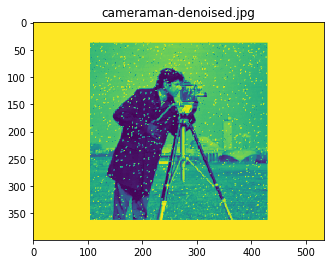

In [4]:
## Reduce pepper noise

img_cameraman = cv2.imread('Cameraman.png',0)
circle_cameraman=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
dilate_cameraman = cv2.dilate(img_cameraman,circle_cameraman,iterations = 1)
plt.imshow(dilate_cameraman)
plt.title('cameraman-denoised.jpg')
#cv2.imwrite('cameraman-denoised.png',dialate_cameraman)

#### 3-Lady (Edge detection):

Text(0.5, 1.0, 'lady-edge.jpg.jpg')

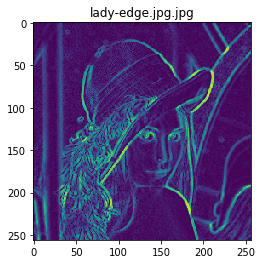

In [5]:
img_lady = cv2.imread('lady.png',0)
kernel_lady=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
lady_dilate=cv2.morphologyEx(img_lady, cv2.MORPH_DILATE, kernel_lady)
lady_edge=cv2.subtract(lady_dilate,img_lady)
plt.imshow(lady_edge)
plt.title('lady-edge.jpg.jpg')
#cv2.imwrite('lady-edge.png',lady_edge)

##### Edge detection using dilation:
    We can detect the edges by getting the difference between the dilation and the original image.
    

## Erosion:

#### Circles:

In [6]:
img_circle=cv2.imread('Circle.png',0)

In [7]:
##Convert to binary

for i in range(img_circle.shape[0]):
    for j in range(img_circle.shape[1]):
        if img_circle[i,j]<100:
            img_circle[i,j]=255
        else:
            img_circle[i,j]=0

Text(0.5, 1.0, 'circle-square1.png')

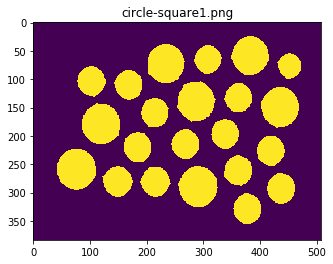

In [8]:
# Circle kernel

circle_kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
circle_erode=cv2.erode(img_circle,circle_kernel)
plt.imshow(circle_erode)
plt.title('circle-square1.png')
#cv2.imwrite('circle-square1.png',circle_erode)

Text(0.5, 1.0, 'circle-square2.png')

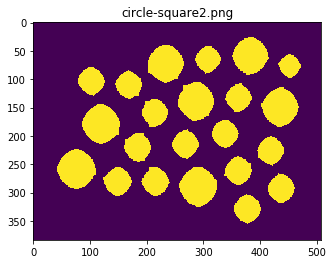

In [9]:
##Square kernel

square_kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
square_erode=cv2.erode(img_circle,square_kernel)
plt.imshow(square_erode)
plt.title('circle-square2.png')
#cv2.imwrite('circle-square2.png',square_erode)

##### Observation:
    Erosion shrinks the white objects. Thus, the white circles had been separated.
    As the size of structuring element increases, the size of the white circles decrease and the small ones disappear.

    

#### Noise reduction:

Text(0.5, 1.0, 'cameraman_erode.png')

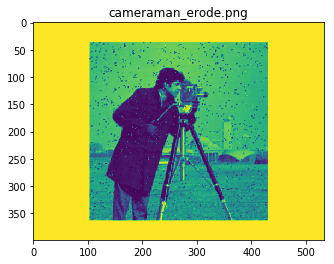

In [10]:
##Cameraman .. reduce salt noise

img_cameraman=cv2.imread('Cameraman.png',0)
cameraman_kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
cameraman_erode=cv2.erode(img_cameraman,cameraman_kernel)
plt.imshow(cameraman_erode)
plt.title('cameraman_erode.png')
#cv2.imwrite('cameraman_erode.png',cameraman_erode)

##### Observation:
    Using stucturing element larger than an object, makes it disappear.

# Opening and Closing:

#### Circles and lines:

Text(0.5, 1.0, 'circle.png')

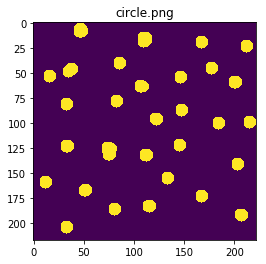

In [11]:
##Separate the circles

img_circ_lines = cv2.imread('Circle_and_Lines.png',0)
kernel_circle=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12))
circles = cv2.morphologyEx(img_circ_lines, cv2.MORPH_OPEN, kernel_circle)
plt.imshow(circles)
plt.title('circle.png')
#cv2.imwrite('circle.png',circles)

##### Explanation:
        -Applying the opening function with stucturing element that is the same size as the circles.
        -As the lines thickness is smaller than the size of circles, it disappeared as a result of the erosion function.
###### Limitations of this method:
        If the lines thickness was the same size or larger than the cicles, they would be detected as well.

In [12]:
##Rotate function

def rotateImage(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [13]:
##Function for lines detection

def detect_lines(image):
    kernel_horiz = np.zeros((60,60), np.uint8)
    for i in range(60):
        kernel_horiz[29, i] = 1
        kernel_horiz[30,i]=1
        kernel_horiz[31,i]=1

    angle = 0
    final_lines = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel_horiz)

    while (angle < 360):
        new_kernel = rotateImage(kernel_horiz, angle)
        new_lines = cv2.morphologyEx(image, cv2.MORPH_OPEN, new_kernel)
        final_lines = cv2.add(final_lines, new_lines)
        angle += 5
    return final_lines

Text(0.5, 1.0, 'line.png')

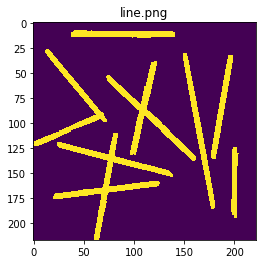

In [14]:
##Separate the lines

lines=detect_lines(img_circ_lines)
plt.imshow(lines)
plt.title('line.png')
# cv2.imwrite('line.png',lines)


##### Explanation:
        -Lines are detected using a line as a structural element.
        -Structual element is rotated by 0->360 degrees.
        -At each degree, the detected lines are added to a resultant image.

In [15]:
def count_objects (image):
    ret, labels = cv2.connectedComponents(image)
    number=ret-1
    return number

In [16]:
##Count the circles

circles_number=count_objects(circles)
print('Number of circles= ',circles_number)

Number of circles=  30


In [17]:
##Count the lines

lines_number=count_objects(lines)
print('Number of connected lines= ',lines_number)

Number of connected lines=  7


#### Replacing the background:

Text(0.5, 1.0, 'night_background.png')

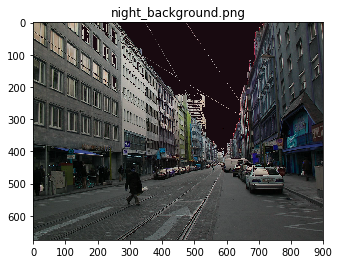

In [18]:
img_morning_rgb = cv2.imread('morning.jpg',1)
img_morning= cv2.cvtColor(img_morning_rgb, cv2.COLOR_BGR2GRAY)

img_evening_rgb=cv2.imread('evening.jpg',1)
img_evening= cv2.cvtColor(img_morning_rgb, cv2.COLOR_BGR2GRAY)

bm, gm, rm= cv2.split(img_morning_rgb)
be, ge, re= cv2.split(img_evening_rgb)
for i in range(img_morning.shape[0]):
    for j in range (img_morning.shape[1]):
        if img_morning[i,j]>200:
            bm[i,j]=be[10,10]
            gm[i,j]=ge[10,10]
            rm[i,j]=re[10,10]

image_edited = cv2.merge((bm, gm, rm))
plt.imshow(image_edited)
plt.title('night_background.png')
#cv2.imwrite('night_background.png',image_edited)


##### Explanation:
        To remove the background:
            -Choose a threshold value to recognize the background.
            -Replace the values that are above this threshold with the value of the evening image background. 

### Coins:

Text(0.5, 1.0, 'Coins_colored.jpg')

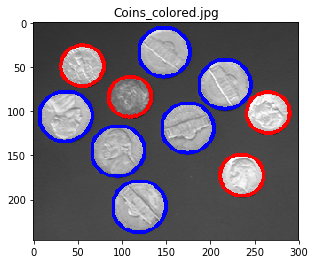

In [19]:
img_coins_rgb=cv2.imread('coins.png',1)
img_coins=cv2.cvtColor(img_coins_rgb, cv2.COLOR_BGR2GRAY)
for i in range(img_coins.shape[0]):
    for j in range(img_coins.shape[1]):
        if img_coins[i,j]<100:
            img_coins[i,j]=0
        else:
            img_coins[i,j]=255

kernel_coin50=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50))
coins50=cv2.morphologyEx(img_coins,cv2.MORPH_OPEN,kernel_coin50)
coins25=cv2.morphologyEx(img_coins,cv2.MORPH_TOPHAT,kernel_coin50)
kernel_coin25=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
coins25=cv2.morphologyEx(coins25,cv2.MORPH_ERODE,kernel_coin25)
kernel_coin255=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
coins25=cv2.morphologyEx(coins25,cv2.MORPH_CLOSE,kernel_coin255)

kernel_edges=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
edges_50=cv2.morphologyEx(coins50,cv2.MORPH_GRADIENT,kernel_edges)
edges_25=cv2.morphologyEx(coins25,cv2.MORPH_GRADIENT,kernel_edges)

bc, gc, rc= cv2.split(img_coins_rgb)
for i in range (img_coins.shape[0]):
    for j in range (img_coins.shape[1]):
        if edges_50[i,j]==255:
            rc[i,j]=255
            gc[i,j]=0
            bc[i,j]=0
        elif edges_25[i,j]==255:
            bc[i,j]=255
            rc[i,j]=0
            gc[i,j]=0

coins_colored = cv2.merge((bc, gc, rc))
plt.imshow(coins_colored)
plt.title('Coins_colored.jpg')
#cv2.imwrite('Coins_colored.png',coins_colored)

##### Explanation:
        -A large structural element is used to detect the large coins using the opening operation.
        -The smaller edges are detected by getting the difference between the original image and the opening (Tophat
        operation).
        -The edges are detected for each size using the gradient operation, then colored with different colors in the
        original image.
        

#### Generalize

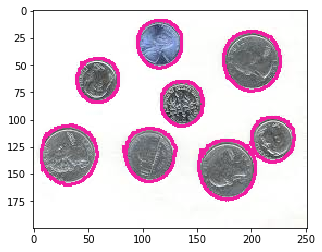

In [20]:
img_coins2_rgb=cv2.imread('coins_color.jpeg',1)
img_coins2=cv2.cvtColor(img_coins2_rgb, cv2.COLOR_BGR2GRAY)
for i in range(img_coins2.shape[0]):
    for j in range(img_coins2.shape[1]):
        if img_coins2[i,j]>225:
            img_coins2[i,j]=0
        else:
            img_coins2[i,j]=255

            
img_coins2=cv2.morphologyEx(img_coins2,cv2.MORPH_DILATE,(2,2))
kernel_edges=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
edges=cv2.morphologyEx(img_coins2,cv2.MORPH_GRADIENT,kernel_edges)

b,g,r=cv2.split(img_coins2_rgb)

for i in range (img_coins2.shape[0]):
    for j in range (img_coins2.shape[1]):
        if edges[i,j]==255:
            r[i,j]=160
            g[i,j]=30
            b[i,j]=240
            ##Purple :')'

coins_colored2 = cv2.merge((b, g,r))

plt.imshow(coins_colored2)

##### Explanation:
        -Edges are detected using gradient operation.
        -The positions of edges are colored in the original image.